In [20]:
import os
import logging
import datetime
import json
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bokeh.plotting import figure, output_notebook, show
from bokeh.io import output_notebook, show

In [21]:
output_notebook()

Loading BokehJS ...

In [2]:
#mypth1 = "data/00/StreamToS3-5-2017-10-22-00-01-18-4c3dcc63-7078-4102-8dbe-e5e4f2fb4716"
#mypth1 = "data/03/StreamToS3-5-2017-10-22-03-00-39-c751b400-ecd7-4e0e-b073-374a697521e0"
#mypth1 = "data/06/StreamToS3-5-2017-10-22-06-01-25-47bff847-45ab-4b83-97a5-9d1439e5e38a"
#mypth1 = "data/23/StreamToS3-5-2017-10-22-23-58-23-51b6d05b-16ac-48c7-aa15-52767952e16b"
#mypth1 = "data/09/StreamToS3-5-2017-10-22-09-02-13-186d70a0-2963-45a8-9441-ed084dc7bf95"
#mypth1 = "data/12/StreamToS3-5-2017-10-22-12-00-13-759f61dc-d1d1-45d8-8f31-22887cea1d64"
#mypth1 = "data/15/StreamToS3-5-2017-10-22-15-00-57-fecebd27-28aa-416b-b588-b96ca8c69cd6"
mypth1 = "data/18/StreamToS3-5-2017-10-22-18-00-45-0d58265b-e06f-48ef-abd9-3b0add398112"

In [3]:
hr_nm = "18"
path = mypth1

In [4]:
hrs = ['00', '01', '02', '03', '04', '05', '06', 
       '07', '08', '09', '10', '11', '12', '13', 
       '14', '15', '16', '17', '18', '19', '20', 
       '21', '22', '23']

In [5]:
tst_path = "data/" + hr_nm + '/StreamToS3-5-2017-10-22-' + '*'
print(tst_path)

data/18/StreamToS3-5-2017-10-22-*


In [12]:
for idx, fname in enumerate(glob.iglob(path)):
    logger = logging.getLogger()
    with open(fname, "r") as f:
        contents = f.read()
        newsletter_traffic = []
        for bit in contents[1:-1].split('}{'):
            try:
                rec = json.loads("{" + bit + "}")
                newsletter_traffic.append(rec)
            except ValueError as e:
                logger.warning("BAD JSON")
                continue

In [13]:
df = pd.DataFrame(newsletter_traffic)
df.head(3)

,authorKey,contentKey,pathRoot,publishedDate,referrer,siteKey,timeStamp,userAgent,userId,userStatus
0,1.000669e+09,1.557006e+09,GALLERY,8/29/2017 9:11:35 PM,http://lm.facebook.com/l.php?u=http%3A%2F%2Fap...,2490368,"Sun, 22 Oct 2017 18:00:41 GMT",Mozilla/5.0 (Linux; Android 5.1.1; SM-J100VPP ...,5252076e-8bfc-4fae-a2f1-4ff6ed1adab6,Guest
1,1.090454e+09,2.719418e+09,BOARD,10/22/2017 5:10:29 AM,https://scout.com/nfl/vikings/Board/102855/Con...,69664768,"Sun, 22 Oct 2017 18:00:45 GMT",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,18c4eb97-c5a3-408a-b7d2-b300646cd208,Guest
2,2.103509e+09,2.907244e+09,GALLERY,10/22/2017 7:23:38 AM,https://www.facebook.com/,25231360,"Sun, 22 Oct 2017 18:00:38 GMT",Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...,d318434f-8010-4581-be5b-33b6a9f84920,Guest


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3461 entries, 0 to 3460
Data columns (total 10 columns):
authorKey        3384 non-null float64
contentKey       3384 non-null float64
pathRoot         3461 non-null object
publishedDate    3384 non-null object
referrer         3110 non-null object
siteKey          3461 non-null int64
timeStamp        3461 non-null object
userAgent        3461 non-null object
userId           3444 non-null object
userStatus       3461 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 270.5+ KB


In [32]:
df.authorKey = df.authorKey.astype(str)
type(df.authorKey[2])

str

In [33]:
df.contentKey = df.contentKey.astype(str) 
df.siteKey = df.siteKey.astype(str)
df.timeStamp = pd.to_datetime(df.timeStamp)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3461 entries, 0 to 3460
Data columns (total 10 columns):
authorKey        3461 non-null object
contentKey       3461 non-null object
pathRoot         3461 non-null object
publishedDate    3384 non-null object
referrer         3110 non-null object
siteKey          3461 non-null object
timeStamp        3461 non-null datetime64[ns]
userAgent        3461 non-null object
userId           3444 non-null object
userStatus       3461 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 270.5+ KB


In [35]:
df.describe()

,authorKey,contentKey,pathRoot,publishedDate,referrer,siteKey,timeStamp,userAgent,userId,userStatus
count,3461,3461,3461,3384,3110,3461,3461,3461,3444,3461
unique,62,227,13,217,106,41,334,735,1358,2
top,1000669260.0,3513583235.0,GALLERY,10/22/2017 11:21:44 AM,http://m.facebook.com,24444928,2017-10-22 18:01:34,Mozilla/5.0 (iPhone; CPU iPhone OS 11_0_3 like...,9f1aacad-8182-4887-a411-ddda63e300b3,Guest
freq,973,345,1604,342,1376,434,22,116,46,3365
first,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-22 17:57:57,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-22 18:07:00,NaN,NaN,NaN


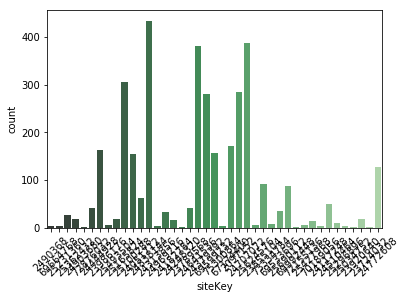

In [19]:
import seaborn as sns
g = sns.countplot(x = "siteKey",
             data = df,
             palette = "Greens_d")
g.set_xticklabels(labels=df.siteKey.unique(), rotation = 45) #not sure if the labels match
plt.show(g)

In [22]:

p = figure(plot_width = 800, plot_height = 300, x_axis_type = "datetime")

p.circle(df['timeStamp'], df['siteKey'], alpha = 0.5)

show(p)

# 9:20 pm

In [23]:
df.referrer.value_counts()

http://m.facebook.com                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               1376
http://m.facebook.com/                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [24]:
df.referrer.unique()

array([ 'http://lm.facebook.com/l.php?u=http%3A%2F%2Fapi.nanigans.com%2Ftarget.php%3Fapp_id%3D312727%26nan_pid%3D1862608003%26target%3D%252F%252Fsea.247sports.com%252FGallery%252FLogos-for-all-32-NFL-Teams-re-imagined-as-professional-wrestlers-106650830%252FGallerySlides%252F662065%253Fftag%253DACQ-07-10aac1b%2526vndid%253D1862608003%2526nan_pid%253D1862608003%2526ad_id%253D7103994%26args&h=ATPpBZyA8mDN2CePikcsp9Gy0bY8vr4G_3wPmXd-hrCwGLXmRmT_qyRGbrJVgMoZNOj7Qivoh5yvtulKP79ojKhXiroBCqbgSBagHWj9kSidEwARFPB_Cl4d0M-lJfoI60gG9ZCXkix4E5furc8MJmytV23cNlc',
       'https://scout.com/nfl/vikings/Board/102855/Contents/Vikings-vs-Ravens-Game-day-thread-109290007?Page=6',
       'https://www.facebook.com/',
       'https://scout.com/nfl/vikings/Board/102855/Contents/Vikings-vs-Ravens-Game-day-thread-109290007?Page=4',
       'http://m.facebook.com', 'http://m.facebook.com/', None,
       'https://m.facebook.com/',
       'http://r.search.yahoo.com/_ylt=AwrBTzaj3OxZT2gAEkBx.9w4;_ylu=X3oDMTByNXM5bzY

In [25]:
st_keys = df.siteKey.unique()
print(type(st_keys))
print(st_keys)
len(st_keys)

<class 'numpy.ndarray'>
['2490368' '69664768' '25231360' '25362432' '24903680' '72876032'
 '24444928' '23986176' '25493504' '25165824' '25100288' '24051712'
 '24838144' '24313856' '24969216' '24182784' '24248320' '23789568'
 '24641536' '24379392' '69599232' '75300864' '67174400' '2097152'
 '24707072' '25624576' '23855104' '73334784' '69533696' '25690112'
 '69992448' '72155136' '25427968' '70189056' '24117248' '24510464'
 '25296896' '25034752' '23920640' '23724032' '24772608']


41

In [26]:
a = df.siteKey.astype(int).unique()
a.sort()
a
st_keys = a.astype(str)
st_keys

array(['2097152', '2490368', '23724032', '23789568', '23855104',
       '23920640', '23986176', '24051712', '24117248', '24182784',
       '24248320', '24313856', '24379392', '24444928', '24510464',
       '24641536', '24707072', '24772608', '24838144', '24903680',
       '24969216', '25034752', '25100288', '25165824', '25231360',
       '25296896', '25362432', '25427968', '25493504', '25624576',
       '25690112', '67174400', '69533696', '69599232', '69664768',
       '69992448', '70189056', '72155136', '72876032', '73334784',
       '75300864'],
      dtype='<U21')

In [27]:
matched = ['23789568', '23855104', '23920640', '23986176', '24051712', 
           '24182784', '24248320', '24313856', '24444928', '25427968', 
           '24838144', '24903680', '25624576', '24969216', '25100288', 
           '25165824', '25231360', '25362432', '2490368', '2097152', 
           '25493504', '24379392', '25296896', '24117248', '24576000', 
           '24641536', '24707072', '24772608', '25034752', '25690112', 
           '24510464', '23724032']
matched.sort()
print(type(matched))
matched

<class 'list'>


['2097152',
 '23724032',
 '23789568',
 '23855104',
 '23920640',
 '23986176',
 '24051712',
 '24117248',
 '24182784',
 '24248320',
 '24313856',
 '24379392',
 '24444928',
 '24510464',
 '24576000',
 '24641536',
 '24707072',
 '24772608',
 '24838144',
 '2490368',
 '24903680',
 '24969216',
 '25034752',
 '25100288',
 '25165824',
 '25231360',
 '25296896',
 '25362432',
 '25427968',
 '25493504',
 '25624576',
 '25690112']

In [28]:
type(st_keys) #numpy.ndarray
remaining = pd.DataFrame(st_keys)
#print(remaining[~remaining.isin(matched)])
remaining = remaining[~remaining.isin(matched)]
#print(type(remaining.iloc[:,0]))
remaining = remaining.dropna()
remaining.sort_values(by = 0)
remaining.iloc[:,0]

31    67174400
32    69533696
33    69599232
34    69664768
35    69992448
36    70189056
37    72155136
38    72876032
39    73334784
40    75300864
Name: 0, dtype: object

In [29]:
#df.siteKey.value_counts()

In [30]:
for key in remaining.iloc[:,0]:
    print(key)
    print(df[df['siteKey'] == key].referrer.value_counts())
    print("")
    print("")
    print("")

67174400
https://scout.com/nfl/bears/Board/103053/Contents/-CAROLINA-PANTHERA-VS-CHICAGO-BEARS--109303186?Page=3    5
Name: referrer, dtype: int64



69533696
https://scout.com/nfl/packers/Board/103108/Contents/Saints-vs-Packers-GAME-DAY-109275628?Page=2                                                                              7
https://scout.com/nfl/packers/Board/103108/Contents/Saints-vs-Packers-GAME-DAY-109275628                                                                                     3
https://scout.com/nfl/packers/Board/103108/Contents/Saints-vs-Packers-GAME-DAY-109275628?Page=2&Notification.Success=Your+Reply+has+been+created+and+is+pending+approval.    3
https://scout.com/nfl/packers/Board/103108/Contents/Saints-vs-Packers-GAME-DAY-109275628?Page=3                                                                              1
Name: referrer, dtype: int64



69599232
https://scout.com/miami-dolphins/Board/103144/Contents/Miami-Dolphins-vs-New-York-Jets-109300801    

In [31]:
#!/usr/bin/env python3
import requests
import getpass

BASE_URL = "https://9n52ntmq97.execute-api.us-east-1.amazonaws.com/prod"
REQUEST_URL = "{base_url}/guess".format(base_url=BASE_URL)
WRONG = {
    "Arizona Cardinals": 23724032, #GOOD ALL 32 MATCHED, 0 LEFT
    "Atlanta Falcons": 23789568, #good 17 so far, 15 to go
    "Baltimore Ravens": 23855104, #good 18 so far, 14 to go
    "Buffalo Bills": 23920640, # good, 19 so far, 13 to go
    "Carolina Panthers": 23986176,# good, 20 so far, 12 to go
    "Chicago Bears": 24051712, #good #scout 67174400
    "Cincinnati Bengals": 24117248, #good, 24 so far, 8 to go
    "Cleveland Browns": 24182784, #good #not 75300864 scout
    "Dallas Cowboys": 24248320, #good #72876032 potentially scout
    "Denver Broncos": 24313856,#good 10 so far #72155136 scout
    "Detroit Lions": 24379392, #good, 22 right 10 to go # not 24313856
    "Green Bay Packers": 24444928, #good #69533696
    "Houston Texans": 24510464, #good, 31 so far, ONLY 1 LEFT
    "Indianapolis Colts": 24576000, #good, 25 so far, 7 to go
    "Jacksonville Jaguars": 24641536, #good 26 so far, 6 to go
    "Kansas City Chiefs": 24707072, #good 27 so far, 5 to go
    "Los Angeles Chargers": 25296896, # good, 23 so far, 9 to go
    "Los Angeles Rams": 25427968, #good 13 so far, 19 to go
    "Miami Dolphins": 24772608, #good, 28 so far, 4 to go
    "Minnesota Vikings": 24838144, # good 11 so far # potentially 69664768 scout
    "New England Patriots": 24903680, #good 12 so far
    "New Orleans Saints": 25624576, #good 15 so far, 17 to go
    "New York Giants": 24969216, #good
    "New York Jets": 25034752, #good, 29 so far, 3 to go
    "Oakland Raiders": 25100288, #good
    "Philadelphia Eagles": 25165824, #good
    "Pittsburgh Steelers": 25231360, #good #69992448
    "San Francisco 49ers": 25362432, #good 21 so far, 11 to go
    "Seattle Seahawks": 2490368, #good 14 so far, 18 to go
    "Tampa Bay Buccaneers": 25690112, #good, 30 so far, 2 to go
    "Tennessee Titans": 2097152, #good 16 so far, 16 to go
    "Washington Redskins": 25493504, #good #70189056 scout
}


def submit_request(guess, username):
    print("Submitting guess!")
    resp = requests.post(REQUEST_URL, json={
        "results": guess,
        "username": username
    })
    print(resp.text)


if __name__ == '__main__':
    print("Submitting guess for {} teams".format(len(WRONG)))
    submit_request(WRONG, getpass.getuser())

Submitting guess for 32 teams
Submitting guess!
{"statusCode": 200, "body": "You got 32 right!", "headers": {"Content-Type": "text/plain"}}
